In [1]:
import pandas as pd
import numpy as np
from dcapy import dca
import matplotlib.pyplot as plt
from datetime import date, datetime

In [2]:
prod = pd.read_csv('prod.csv')
prod['date'] = pd.to_datetime(prod['date'], format='%Y-%m-%d')
prod = prod.loc[prod['well']>0,:]
prod.tail()

,date,well
602,2021-02-27,97.47
603,2021-02-28,97.56
604,2021-03-01,97.65
605,2021-03-02,97.74
606,2021-03-03,97.92


<AxesSubplot:xlabel='date'>

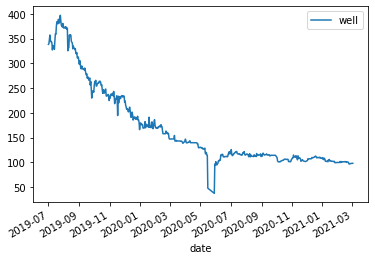

In [3]:
prod.plot(x='date',y='well')

In [4]:
d1 = dca.Arps(freq_di='D')
d1.fit(df=prod,time='date',rate='well')
d1

Declination 
 Ti: 2019-07-01 
 Qi: 405.56298531987994 bbl/d 
 Di: 0.00607804351493284 D 
 b: 0.9832447564542263

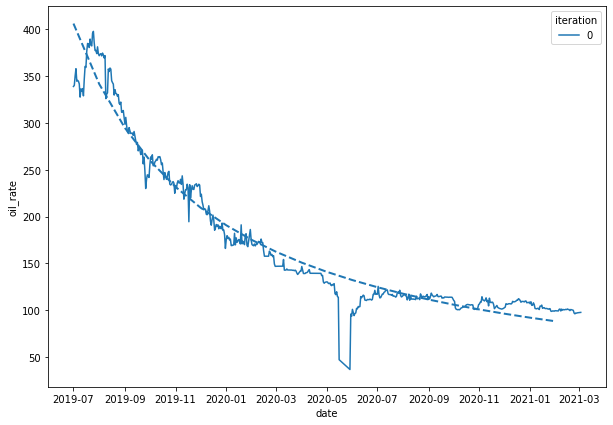

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(prod['date'],prod['well'])

d1.plot(ax=ax, start=date(2019,7,1), end=date(2021,2,28))

In [6]:
d2 = dca.Arps(freq_di='D')
d2.fit(df=prod,time='date',rate='well', prob=True)
d2

Declination 
 Ti: 2019-07-01 
 Qi: dist='norm' kw={'loc': 405.56298531987994, 'scale': 3.657490070408073} bbl/d 
 Di: dist='norm' kw={'loc': 0.00607804351493284, 'scale': 0.0002327516794952698} D 
 b: dist='norm' kw={'loc': 0.9832447564542263, 'scale': 0.042897007216491256}

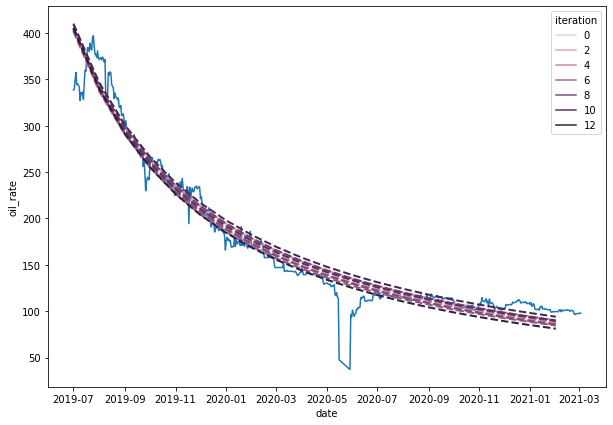

In [7]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(prod['date'],prod['well'])

d2.plot(ax=ax, start=date(2019,7,1), end=date(2021,2,28), iter=13)

In [8]:
d3 = dca.Arps(freq_di='D')
d3.fit(df = prod.reset_index(),time='index',rate='well')
d3

Declination 
 Ti: 0 
 Qi: 405.3327917934602 bbl/d 
 Di: 0.006044769866186063 D 
 b: 0.9729609640006837

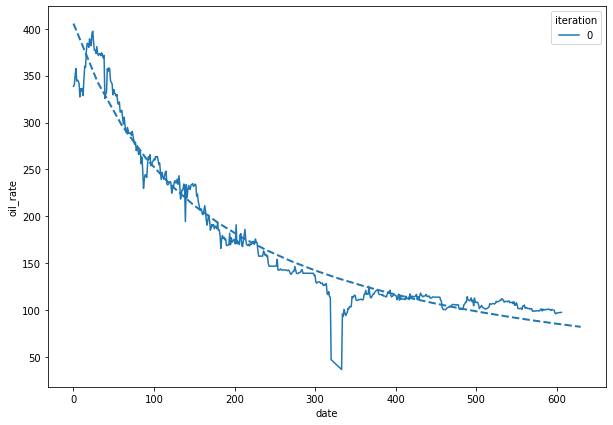

In [9]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(prod.index,prod['well'])

d3.plot(ax=ax, start=0, end=650)